#CPSC 483 - Project 3
##Winston Do
This project imported housing data from a database and sliced 80% of the data to be used as training and the rest as testing. 
The data consited of 13 features with our desired output being the median house price. In all, a total of five models were trained using sklearn.linear_model.LinearRegression. 

The first model only utilized one of the features to train a linear model. The result was a simple linear model that had high average training and testing error. However, of all the models, the delta between the training and testing MSE is small, making this first model the best in terms of minimizing bias and variance trade off. 

The second model involved taking the features of the first data set and adding the square values to the input, resulting in a 2 degree polynominal model. The resulting model, dubbed degree 2 polynominal model (D2P) below, resulting in underfitting.

The third model used all 13 features of the data set, resulting in a multiple linear regression model (MLR). The result was an overfit.

The forth model combined both MLR and D2P, by using all 13 features and constructing new polynominal features. This had the lowest average training and testing errors of all the models but resulted in a slight over fit. 

The final model used sckit's native API to perform what the fourth model did manually. This resulted in an overfit.

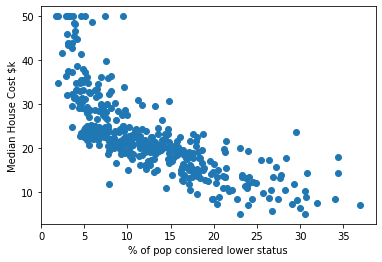

In [87]:
#CPSC 483
#Project 3
#Winston Do

import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from google.colab import files
from sklearn.linear_model import LinearRegression
import sklearn.model_selection


#upload = files.upload()


data = np.load('boston.npz')

feature_train_data, feature_test_data, target_train_data, target_test_data = sk.model_selection.train_test_split(data['features'], data['target'], test_size = 0.2, train_size = 0.8, random_state=(2021-3-11))

#accessing column syntax
x = feature_train_data[:,12] #get LSAT feature
y = target_train_data

plt.xlabel("% of pop consiered lower status")
plt.ylabel("Median House Cost $k")
plt.plot(x, y, 'o')


The relation ship does seem to be inversely linear. 
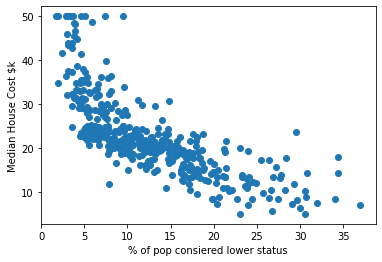

Coeffecient of LSTAT_v_MDEV is:  [-0.98093888]
y = intercept of LSTAT_v_MDEV is:  34.99113302196947


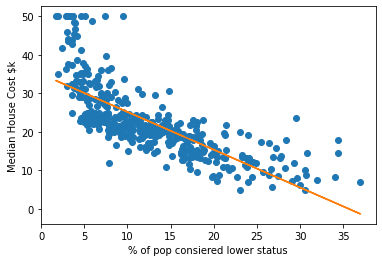

In [88]:
x_column = x.reshape(-1, 1) #need to reshape the LSAT (x) features
#print(x_column.shape)
LSTAT_v_MDEV = sk.linear_model.LinearRegression().fit(x_column, y)

m = LSTAT_v_MDEV.coef_
b = LSTAT_v_MDEV.intercept_
print("Coeffecient of LSTAT_v_MDEV is: ", m)
print("y = intercept of LSTAT_v_MDEV is: ", b)

plt.xlabel("% of pop consiered lower status")
plt.ylabel("Median House Cost $k")
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

The equation for LSTAT versus MDEV is:

$y = -0.98093888 x + 34.991$ 

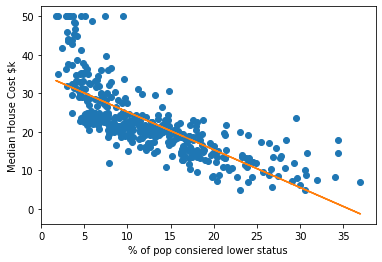

The line seems like a moderate fit. However, the line does not take into acount the values at the top left of the scatterplot. A polynominal curve seems to be the better fit.


In [89]:
#predicting the values for training data of LSTAT
train_predict_values = LSTAT_v_MDEV.predict(x_column)

#getting average training loss for training data on LSAT features
#print(train_predict_values.shape)
#print(y.shape)
train_avg_loss = sk.metrics.mean_squared_error(train_predict_values, y)
print("average loss for training data was:", train_avg_loss)



average loss for training data was: 38.47893344802523


In [90]:
x_test = feature_test_data[:,12] #get LSAT feature

x_test = x_test.reshape(-1, 1) #need to reshape the LSAT (x) features
test_predict_values = LSTAT_v_MDEV.predict(x_test)
test_avg_loss = sk.metrics.mean_squared_error(test_predict_values, target_test_data)
print("average loss for testing data was:", test_avg_loss)

average loss for testing data was: 38.75054664279496


The training average loss and test average loss were comparable with their values being 38.47893344802523 and 38.75054664279496, repectively.

In [91]:
#forming new polyn of degree 2
x_LSAT_poly = np.hstack((x_column, np.square(x_column))) 
x_test_poly = np.hstack((x_test, np.square(x_test)))


#training a new polynominal model
LSTAT_v_MDEV_poly = sk.linear_model.LinearRegression().fit(x_LSAT_poly, target_train_data)


#training data
train_predict_values_poly = LSTAT_v_MDEV_poly.predict(x_LSAT_poly)
train_avg_loss_poly = sk.metrics.mean_squared_error(train_predict_values_poly, target_train_data)
print("average loss for training data was:", train_avg_loss_poly)

#test data
test_predict_values_poly = LSTAT_v_MDEV_poly.predict(x_test_poly)
test_avg_loss_poly = sk.metrics.mean_squared_error(test_predict_values, target_test_data)
print("average loss for testing data was:", test_avg_loss_poly)

average loss for training data was: 30.59851434937097
average loss for testing data was: 38.75054664279496


Average loss for training data was: 30.59851434937097

Average loss for testing data was: 38.75054664279496

It seems with a degree-2 polynominal model (D2P) , there is underfitting.

Coeffecient of LSTAT_v_MDEV_poly is:  -2.3659190034279725
Coeffecient of LSTAT_v_MDEV_poly is:  0.04440767179402064
y = intercept of LSTAT_v_MDEV_poly is:  43.07121508120751


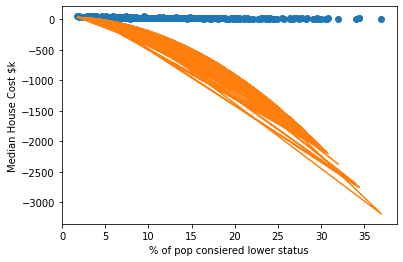

In [92]:
m0_poly = LSTAT_v_MDEV_poly.coef_[0]
m1_poly = LSTAT_v_MDEV_poly.coef_[1]
b_poly = LSTAT_v_MDEV_poly.intercept_
print("Coeffecient of LSTAT_v_MDEV_poly is: ", m0_poly)
print("Coeffecient of LSTAT_v_MDEV_poly is: ", m1_poly)
print("y = intercept of LSTAT_v_MDEV_poly is: ", b_poly)

plt.xlabel("% of pop consiered lower status")
plt.ylabel("Median House Cost $k")
plt.plot(x, y, 'o')
plt.plot(x, m0_poly*x*x + m1_poly*x + b_poly)

In [93]:
MULTI_LREGRESSION_MODEL = sk.linear_model.LinearRegression().fit(feature_train_data, target_train_data)

m_multi = MULTI_LREGRESSION_MODEL.coef_
b_multi = MULTI_LREGRESSION_MODEL.intercept_
print("Coeffecients of MULTI_LREGRESSION_MODEL is: ", m_multi)
print("y = intercept of MULTI_LREGRESSION_MODEL is: ", b_multi)

Coeffecients of MULTI_LREGRESSION_MODEL is:  [-1.19721961e-01  5.29635924e-02  5.16150347e-02  2.55847703e+00
 -1.72524020e+01  4.08697043e+00 -4.64415129e-03 -1.52421308e+00
  2.99638323e-01 -1.37152390e-02 -8.48912621e-01  6.56971068e-03
 -5.33276034e-01]
y = intercept of MULTI_LREGRESSION_MODEL is:  34.33727849058856


The equation of the multiple linear regression model is:

$y = 34.33727849058856 + -0.1197x_0 + 0.05296x_1 + 0.051615x_2 + 2.5585x_3 + -17.252x_4 + 4.086x_5 + -0.004644x_6 + -1.524x_7 + 0.2996x_8 + -0.01371x_9 + 0.8491x_{10} + 0.006567x_{11} + -0.53326x_{12} $

In [94]:
#training data

train_avg_loss_MLR = sk.metrics.mean_squared_error(MULTI_LREGRESSION_MODEL.predict(feature_train_data), target_train_data)
print("average loss for training data was:", train_avg_loss_MLR)

#test data

test_avg_loss_MLR = sk.metrics.mean_squared_error(MULTI_LREGRESSION_MODEL.predict(feature_test_data), target_test_data)
print("average loss for testing data was:", test_avg_loss_MLR)

average loss for training data was: 21.04634080534237
average loss for testing data was: 25.976408935996588


Average loss for training data was: 21.04634080534237

Average loss for testing data was: 25.976408935996588

It seems with using all 13 features to train our model with multiple linear regression (MLR) we seem to be overfitting as the training data's MSE is slightly less than the testing data. 

The D2P model tends to underfit whereas the MLR model tends to overfit. As the original model's used a small subset of data (the Boston area) to predict the median value of houses based on specific features, it would be more prudent to us an underfitted model to add robustness towards more generalized data.

In [95]:
x_train_MLR_poly = np.hstack((feature_train_data, np.square(feature_train_data))) 
x_test_MLR_poly = np.hstack((feature_test_data, np.square(feature_test_data)))


#training a new polynominal model
MULTI_LREGRESSION_MODEL_poly = sk.linear_model.LinearRegression().fit(x_train_MLR_poly, target_train_data)


#training data

train_avg_loss_MLR_poly = sk.metrics.mean_squared_error(MULTI_LREGRESSION_MODEL_poly.predict(x_train_MLR_poly), target_train_data)
print("average loss for training data was:", train_avg_loss_MLR_poly)

#test data
test_avg_loss_MLR_poly = sk.metrics.mean_squared_error(MULTI_LREGRESSION_MODEL_poly.predict(x_test_MLR_poly), target_test_data)
print("average loss for testing data was:", test_avg_loss_MLR_poly)

average loss for training data was: 13.508100802461714
average loss for testing data was: 17.857896093013565


Average loss for training data was: 13.508100802461714

Average loss for testing data was: 17.857896093013565

The combination of polynominal regression and multiple linear regression seems to have reduced the average loss of both training and testing data sets by a factor of ~2. The new model seems to be slightly overfitting, however.



In [96]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)
X = poly.fit_transform(feature_train_data)
X_test = poly.fit_transform(feature_test_data)


#training a new polynominal model
PolyF_Model = sk.linear_model.LinearRegression().fit(X, target_train_data)


#training data
print("Average loss for training data was:", sk.metrics.mean_squared_error(PolyF_Model.predict(X), target_train_data))
print("\n")

#test data
print("Average loss for testing data was:", sk.metrics.mean_squared_error(PolyF_Model.predict(X_test), target_test_data))

Average loss for training data was: 10.830195868485932


Average loss for testing data was: 20.467478479482796


Average loss for training data was: 10.830195868485932


Average loss for testing data was: 20.467478479482796

With the built in polynominal feature construction tools native to the scikit learn API, the model seems to overfit. We have the lowest training average loss value of all the models. However, the testing average loss is slightly higher than adding the squared features manually with the multiple linear regression polynominal model. 